In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [7]:
sales = pd.read_csv("C:/Users/dgriffin66/OneDrive - Central Methodist University/Data analytics/Database_Files/Adidas US Sales Data(2).csv") # import dataframe
sales.columns = sales.columns.str.replace(" ", "") # delete spaces

In [8]:
sales # display for testing

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
0,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$53.00,83,"$4,399","$1,408",32%,Outlet
1,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$68.00,83,"$5,644","$2,427",43%,Online
2,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$34.00,384,"$13,056","$6,789",52%,Outlet
3,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$47.00,336,"$15,792","$9,633",61%,Online
4,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$75.00,275,"$206,250","$61,875",30%,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$46.00,56,"$2,576","$1,005",39%,Outlet
9644,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$63.00,47,"$2,961","$1,362",46%,Online
9645,Amazon,1185732,12/31/2021,Northeast,Maine,Portland,Men's Apparel,$55.00,125,"$68,750","$17,188",25%,Outlet
9646,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$70.00,175,"$122,500","$42,875",35%,Outlet


In [9]:
sales.info() # collect info on datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Retailer         9648 non-null   object
 1   RetailerID       9648 non-null   int64 
 2   InvoiceDate      9647 non-null   object
 3   Region           9643 non-null   object
 4   State            9648 non-null   object
 5   City             9648 non-null   object
 6   Product          9648 non-null   object
 7   PriceperUnit     9644 non-null   object
 8   UnitsSold        9645 non-null   object
 9   TotalSales       9638 non-null   object
 10  OperatingProfit  9635 non-null   object
 11  OperatingMargin  9648 non-null   object
 12  SalesMethod      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [10]:
sales

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
0,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$53.00,83,"$4,399","$1,408",32%,Outlet
1,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$68.00,83,"$5,644","$2,427",43%,Online
2,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$34.00,384,"$13,056","$6,789",52%,Outlet
3,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$47.00,336,"$15,792","$9,633",61%,Online
4,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$75.00,275,"$206,250","$61,875",30%,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$46.00,56,"$2,576","$1,005",39%,Outlet
9644,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$63.00,47,"$2,961","$1,362",46%,Online
9645,Amazon,1185732,12/31/2021,Northeast,Maine,Portland,Men's Apparel,$55.00,125,"$68,750","$17,188",25%,Outlet
9646,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$70.00,175,"$122,500","$42,875",35%,Outlet


In [11]:
sales.iloc[6724]

Retailer           Sports Direct
RetailerID               1197831
InvoiceDate            8/23/2021
Region                     South
State                    Alabama
City                  Birmingham
Product            Men's Apparel
PriceperUnit             $25.00 
UnitsSold                    NaN
TotalSales              $68,750 
OperatingProfit         $27,500 
OperatingMargin              40%
SalesMethod               Outlet
Name: 6724, dtype: object

In [12]:
# View null rows
null_rows = sales[sales.isna().any(axis=1)]
null_rows

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
485,West Gear,1185732,4/24/2020,Southeast,Florida,Miami,Men's Apparel,$55.00,NaN,"$371,250","$129,938",35%,In-store
954,Walmart,1197831,9/9/2020,South,Texas,Houston,Men's Apparel,NaN,625,"$281,250","$84,375",30%,Outlet
984,Walmart,1197831,9/15/2020,South,Texas,Houston,Men's Apparel,NaN,575,"$258,750","$77,625",30%,Outlet
1558,West Gear,1185732,1/12/2021,Southeast,Florida,Orlando,Men's Apparel,NaN,550,"$302,500","$105,875",35%,In-store
1898,Foot Locker,1128299,1/24/2021,West,Wyoming,Cheyenne,Men's Apparel,$42.00,45,"$1,890",NaN,51%,Online
2076,Sports Direct,1185732,2/5/2021,Northeast,New Jersey,Newark,Women's Street Footwear,$29.00,65,"$1,885",NaN,45%,Online
2168,Sports Direct,1185732,2/9/2021,NaN,South Dakota,Sioux Falls,Women's Street Footwear,$24.00,68,"$1,632",$685,42%,Online
2228,West Gear,1185732,2/11/2021,Midwest,Missouri,St. Louis,Women's Street Footwear,$14.00,115,NaN,$725,45%,Online
2261,Amazon,1185732,2/12/2021,Northeast,Vermont,Burlington,Women's Athletic Footwear,$36.00,45,NaN,$745,46%,Online
2705,Sports Direct,1185732,3/3/2021,NaN,Connecticut,Hartford,Men's Apparel,$48.00,39,"$1,872",NaN,40%,Online


In [13]:
sales.nunique() # get unique value information

Retailer              6
RetailerID            4
InvoiceDate         724
Region                5
State                50
City                 52
Product               6
PriceperUnit         95
UnitsSold           361
TotalSales         3134
OperatingProfit    4183
OperatingMargin      66
SalesMethod           3
dtype: int64

In [14]:
# Turn each of the objects into floats so they can be worked with
floatConvert = ["PriceperUnit", "UnitsSold", "TotalSales", "OperatingProfit"]
for col in floatConvert:
    sales[col] = sales[col].astype(str).str.strip().str.replace("$", "", regex=False)
    sales[col] = sales[col].astype(str).str.strip().str.replace(",", "", regex=False)
    sales[col] = pd.to_numeric(sales[col], errors="coerce")

In [15]:
# Turn Operating Margin to percent so it can be worked with
sales["OperatingMargin"] = sales["OperatingMargin"].str.strip("%").astype("float") / 100

In [16]:
sales["PriceperUnit"] = sales["PriceperUnit"].fillna(sales["TotalSales"] / sales["UnitsSold"])
sales["UnitsSold"] = sales["UnitsSold"].fillna(sales["TotalSales"] / sales["PriceperUnit"])
sales["TotalSales"] = sales["TotalSales"].fillna(sales["PriceperUnit"] * sales["UnitsSold"])
sales["OperatingProfit"] = sales["OperatingProfit"].fillna(sales["TotalSales"] * sales["OperatingMargin"]).round(decimals = 0)

In [17]:
sales

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
0,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53.0,83.0,4399.0,1408.0,0.32,Outlet
1,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,68.0,83.0,5644.0,2427.0,0.43,Online
2,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,34.0,384.0,13056.0,6789.0,0.52,Outlet
3,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,47.0,336.0,15792.0,9633.0,0.61,Online
4,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75.0,275.0,206250.0,61875.0,0.30,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,46.0,56.0,2576.0,1005.0,0.39,Outlet
9644,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,63.0,47.0,2961.0,1362.0,0.46,Online
9645,Amazon,1185732,12/31/2021,Northeast,Maine,Portland,Men's Apparel,55.0,125.0,68750.0,17188.0,0.25,Outlet
9646,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,70.0,175.0,122500.0,42875.0,0.35,Outlet


In [19]:
sales_gender = sales.groupby('Product')

<Axes: title={'center': 'Total Unit Products Sold'}, xlabel='Products', ylabel='Units Sold'>

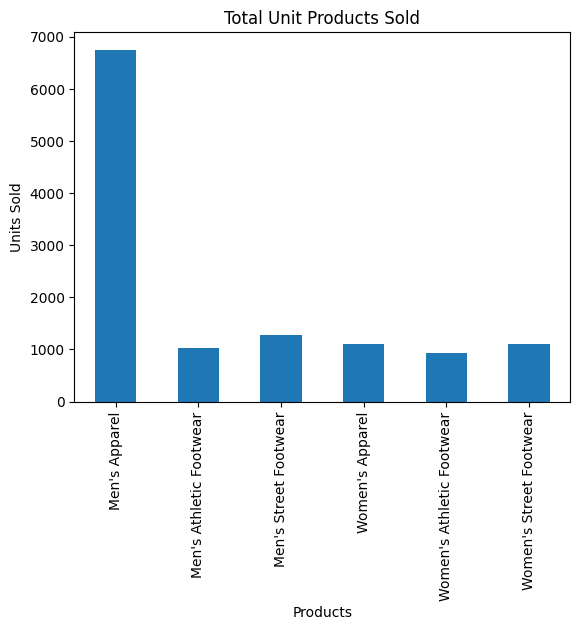

In [34]:
sales_units = sales.groupby('Product')['UnitsSold'].max()
sales_units.plot.bar(x='Product', y='UnitsSold', xlabel='Products', ylabel='Units Sold', title ='Total Unit Products Sold')



<Axes: xlabel='InvoiceDate', ylabel='UnitsSold'>

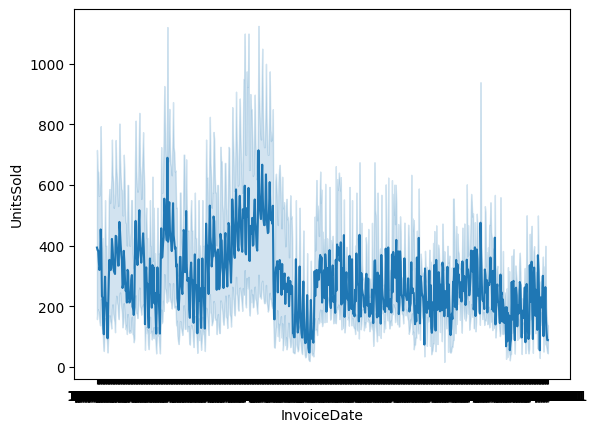

In [38]:

sns.lineplot(data= sales, x='InvoiceDate', y='UnitsSold')
